In [1]:
%load_ext autoreload 

# automatically reload packages imported with %aimport <package>
%autoreload 1 
%aimport src, src.features

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import os
import pickle
import matplotlib.pyplot as plt

# Feature extraction demo

Below you can find examples for extracting features using the different feature extractors in the package

## Configuring input paths

In [3]:
from src.data import load_metadata, relative_file_path

In [4]:
metadata = load_metadata()
subset = metadata.iloc[:2]

In [5]:
def find_paths(metadata, base_folder, file_extension):
    paths = []
    for i in range(len(metadata)):
        relative_path = relative_file_path( 
            metadata.show_filename_prefix.iloc[i], 
            metadata.episode_filename_prefix.iloc[i] )
        path = os.path.join(
            base_folder,
            relative_path + file_extension
        )
        paths.append(path)
    return paths

In [6]:
AUDIO_DATA = "/unix/cdtdisspotify/data/spotify-podcasts-2020/podcasts-audio"
audio_paths = find_paths(subset, AUDIO_DATA, ".ogg")

## OpenSmile

In [31]:
from src.features import OpenSmileExtractor

In [ ]:
output_paths = find_paths(subset, "../test_dir/opensmile/", ".pkl")

In [32]:
ex = OpenSmileExtractor()

In [33]:
ex.extract(audio_paths, output_paths, num_workers=2)

test
True True
True True


In [30]:
test_output = pickle.load(open(output_paths[0], "rb"))
test_output.head()

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/unix/cdtdisspotify/data/spotify-podcasts-2020/podcasts-audio/2/N/show_2NYtxEZyYelR6RMKmjfPLB/000A9sRBYdVh66csG2qEdj.ogg,0 days,0 days 00:12:42.007800454,31.64986,0.238911,26.194715,32.806679,36.585495,10.390779,357.09549,549.552368,118.152977,263.271454,...,0.010513,-0.009808,1.560238,3.605034,1.312439,0.32633,0.328433,0.07953,0.071537,-13.024042


## VGGish

setting up the environment and setting the output paths

In [9]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from src.features import VGGishExtractor

In [10]:
preprocess_path = find_paths(subset, "../test_dir/preprocess/", ".pkl")
embed_path = find_paths(subset, "../test_dir/embed/", ".pkl")
postprocess_path = find_paths(subset, "../test_dir/postprocess/", ".pkl")

In [11]:
ex = VGGishExtractor()

### Pre-processing

Turning raw audio features into logartihmic Mel spectrograms

In [12]:
ex.pre_processing(audio_paths, preprocess_path, num_workers=2)

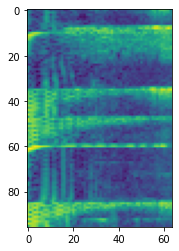

In [25]:
pre_processed = pickle.load(open(preprocess_path[0], "rb"))
plt.imshow(pre_processed[0])

## Embedding

Turning the logarithmic Mel spectorgrams into 128 values embedding vectors

In [16]:
ex.embedding(preprocess_path, embed_path) # embedding is parallelised on the gpu so no num_workers

INFO:tensorflow:Restoring parameters from ./notebooks/vggish_model.ckpt


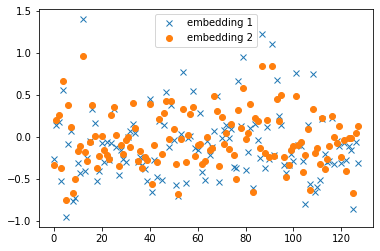

In [32]:
embedding = pickle.load(open(embed_path[0], "rb"))
plt.plot(embedding[0], 'x', label='embedding 1')
plt.plot(embedding[1], 'o', label="embedding 2")
plt.legend()

### Post-processing

Post processing the data using a PCA based on the YouTube 8M dataset

In [20]:
ex.post_processing(embed_path, postprocess_path, num_workers=2)

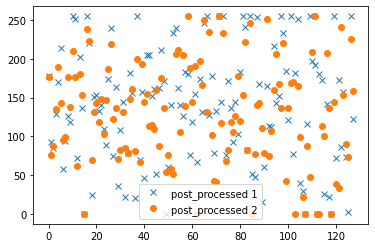

In [33]:
post_processed = pickle.load(open(postprocess_path[0], "rb"))
plt.plot(post_processed[0], 'x', label='post_processed 1')
plt.plot(post_processed[1], 'o', label="post_processed 2")
plt.legend()